# FORESEE - Up-Philic - Sytematics

### Load Libraries 

In [12]:
import numpy as np
import sys
import os
import math
import matplotlib
from matplotlib import pyplot as plt
#src_path = "/Users/felixkling/Documents/GitHub/FORESEE/"
src_path = "/Users/abraham/Documents/GitHub/roshanFORESEE/"
sys.path.append(src_path)
from src.foresee import Foresee, Utility, Model

## 1. Specifying the Model 

Let us specify again the model. But this time 
- we add copies of ch channel with dfferent `n_sample` to test the `n_sample` dependence. 
- we add additional copies of each channel, so that we can infer MC statistical uncertainties. 

Note that we choose the `label` accordingly. 

In [13]:
nsamples = [1,3,10,30,100,300,1000]
ncopies = 5

generators = [ 'Pythia8-Forward', 'EPOSLHC', 'SIBYLL', 'QGSJET']
generators_etaprime = ['EPOSLHC', 'SIBYLL', 'Pythia8-Forward']

In [14]:
# initialize
energy = "13.6"
modelname="UpPhilic"
model = Model(modelname, path="./")

# ad production channels
for nsample in nsamples:
    for ncopy in range(ncopies):
        model.add_production_2bodydecay(
            label = "221_"+str(nsample)+"_"+str(ncopy),
            pid0 = "221",
            pid1 = "111",
            br = "1.26e5 * coupling**2 * np.sqrt((1-(mass+0.135)**2/0.547**2)*(1-(mass-0.135)**2/0.547**2))",
            generator = generators,
            energy = energy,
            nsample = nsample
        )
        model.add_production_2bodydecay(
            label = "331_"+str(nsample)+"_"+str(ncopy),
            pid0 = "331",
            pid1 = "111",
            br = "273. * coupling**2 * np.sqrt((1-(mass+0.135)**2/0.957**2)*(1-(mass-0.135)**2/0.957**2))",
            generator = generators,
            energy = energy,
            nsample = nsample, 
        )
        model.add_production_2bodydecay(
            label = "321_"+str(nsample)+"_"+str(ncopy),
            pid0 = "321",
            pid1 = "211",
            br = "7.42 * coupling**2 * np.sqrt((1-(mass+0.135)**2/0.49368**2)*(1-(mass-0.135)**2/0.49368**2))",
            generator = generators,
            energy = energy,
            nsample = nsample, 
        )
        model.add_production_2bodydecay(
            label = "-321_"+str(nsample)+"_"+str(ncopy),
            pid0 = "-321",
            pid1 = "-211",
            br = "7.42 * coupling**2 * np.sqrt((1-(mass+0.135)**2/0.49368**2)*(1-(mass-0.135)**2/0.49368**2))",
            generator = generators,
            energy = energy,
            nsample = nsample, 
        )        

# add  ctau and BR
model.set_ctau_1d(filename="model/ctau.txt")
branchings = [
    ["gamma"     , "black"        , "solid" , r"$\gamma\gamma$"         , 0.110, 0.50],
    ["pi0_pi0"   , "blue"          , "solid" , r"$\pi^0\pi^0$"          , 0.225, 0.03],
    ["pi+_pi-"   , "red"         , "solid" , r"$\pi^+\pi^-$"           , 0.300, 0.03],
]

finalstates=[
    [22,22], [111,111],[211,-211]
]

model.set_br_1d(
    modes=[channel for channel,_,_,_,_,_ in branchings],
    finalstates=finalstates,
    filenames=["model/br/"+channel+".txt" for channel,_,_,_,_,_ in branchings],
)

# finish
foresee = Foresee(path=src_path)
foresee.set_model(model=model)

# Let's also define the detector 
distance, selection, length, luminosity = 476, "np.sqrt(x.x**2 + (x.y+0.065)**2)<.1", 3.5, 60
foresee.set_detector(distance=distance, selection=selection, length=length, luminosity=luminosity)

## 2. Generate LLP Spectra

Now let's specify the benchmark mass, in this case $m_{S}=350$ MeV, and produce the corresponding fluxes. 

In [15]:
mass=0.35
plot = foresee.get_llp_spectrum(mass=mass, coupling=1)

save data to file: ./model/LLP_spectra/13.6TeV_221_1_0_Pythia8-Forward_m_0.35.npy
save data to file: ./model/LLP_spectra/13.6TeV_221_1_0_EPOSLHC_m_0.35.npy
save data to file: ./model/LLP_spectra/13.6TeV_221_1_0_SIBYLL_m_0.35.npy
save data to file: ./model/LLP_spectra/13.6TeV_221_1_0_QGSJET_m_0.35.npy
save data to file: ./model/LLP_spectra/13.6TeV_331_1_0_Pythia8-Forward_m_0.35.npy
save data to file: ./model/LLP_spectra/13.6TeV_331_1_0_EPOSLHC_m_0.35.npy
save data to file: ./model/LLP_spectra/13.6TeV_331_1_0_SIBYLL_m_0.35.npy
save data to file: ./model/LLP_spectra/13.6TeV_331_1_0_QGSJET_m_0.35.npy


/Users/abraham/Documents/GitHub/roshanFORESEE/src/foresee.py:495: RuntimeWarning: overflow encountered in exp
  if (theta < 0.05/ltas): probability = 1.- np.exp(- ltas/dbarz)


save data to file: ./model/LLP_spectra/13.6TeV_321_1_0_Pythia8-Forward_m_0.35.npy
save data to file: ./model/LLP_spectra/13.6TeV_321_1_0_EPOSLHC_m_0.35.npy
save data to file: ./model/LLP_spectra/13.6TeV_321_1_0_SIBYLL_m_0.35.npy
save data to file: ./model/LLP_spectra/13.6TeV_321_1_0_QGSJET_m_0.35.npy
save data to file: ./model/LLP_spectra/13.6TeV_-321_1_0_Pythia8-Forward_m_0.35.npy
save data to file: ./model/LLP_spectra/13.6TeV_-321_1_0_EPOSLHC_m_0.35.npy
save data to file: ./model/LLP_spectra/13.6TeV_-321_1_0_SIBYLL_m_0.35.npy
save data to file: ./model/LLP_spectra/13.6TeV_-321_1_0_QGSJET_m_0.35.npy
save data to file: ./model/LLP_spectra/13.6TeV_221_1_1_Pythia8-Forward_m_0.35.npy
save data to file: ./model/LLP_spectra/13.6TeV_221_1_1_EPOSLHC_m_0.35.npy
save data to file: ./model/LLP_spectra/13.6TeV_221_1_1_SIBYLL_m_0.35.npy
save data to file: ./model/LLP_spectra/13.6TeV_221_1_1_QGSJET_m_0.35.npy
save data to file: ./model/LLP_spectra/13.6TeV_331_1_1_Pythia8-Forward_m_0.35.npy
save dat

/Users/abraham/Documents/GitHub/roshanFORESEE/src/foresee.py:684: RuntimeWarning: invalid value encountered in multiply
  w_decays = np.array([self.get_decay_prob(pid0, p_mother)*w_mother for w_mother, p_mother in zip(weights_mother,momenta_mother)])


save data to file: ./model/LLP_spectra/13.6TeV_321_1_3_Pythia8-Forward_m_0.35.npy
save data to file: ./model/LLP_spectra/13.6TeV_321_1_3_EPOSLHC_m_0.35.npy
save data to file: ./model/LLP_spectra/13.6TeV_321_1_3_SIBYLL_m_0.35.npy
save data to file: ./model/LLP_spectra/13.6TeV_321_1_3_QGSJET_m_0.35.npy
save data to file: ./model/LLP_spectra/13.6TeV_-321_1_3_Pythia8-Forward_m_0.35.npy
save data to file: ./model/LLP_spectra/13.6TeV_-321_1_3_EPOSLHC_m_0.35.npy
save data to file: ./model/LLP_spectra/13.6TeV_-321_1_3_SIBYLL_m_0.35.npy
save data to file: ./model/LLP_spectra/13.6TeV_-321_1_3_QGSJET_m_0.35.npy
save data to file: ./model/LLP_spectra/13.6TeV_221_1_4_Pythia8-Forward_m_0.35.npy
save data to file: ./model/LLP_spectra/13.6TeV_221_1_4_EPOSLHC_m_0.35.npy
save data to file: ./model/LLP_spectra/13.6TeV_221_1_4_SIBYLL_m_0.35.npy
save data to file: ./model/LLP_spectra/13.6TeV_221_1_4_QGSJET_m_0.35.npy
save data to file: ./model/LLP_spectra/13.6TeV_331_1_4_Pythia8-Forward_m_0.35.npy
save dat

save data to file: ./model/LLP_spectra/13.6TeV_321_10_0_Pythia8-Forward_m_0.35.npy
save data to file: ./model/LLP_spectra/13.6TeV_321_10_0_EPOSLHC_m_0.35.npy
save data to file: ./model/LLP_spectra/13.6TeV_321_10_0_SIBYLL_m_0.35.npy
save data to file: ./model/LLP_spectra/13.6TeV_321_10_0_QGSJET_m_0.35.npy
save data to file: ./model/LLP_spectra/13.6TeV_-321_10_0_Pythia8-Forward_m_0.35.npy
save data to file: ./model/LLP_spectra/13.6TeV_-321_10_0_EPOSLHC_m_0.35.npy
save data to file: ./model/LLP_spectra/13.6TeV_-321_10_0_SIBYLL_m_0.35.npy
save data to file: ./model/LLP_spectra/13.6TeV_-321_10_0_QGSJET_m_0.35.npy
save data to file: ./model/LLP_spectra/13.6TeV_221_10_1_Pythia8-Forward_m_0.35.npy
save data to file: ./model/LLP_spectra/13.6TeV_221_10_1_EPOSLHC_m_0.35.npy
save data to file: ./model/LLP_spectra/13.6TeV_221_10_1_SIBYLL_m_0.35.npy
save data to file: ./model/LLP_spectra/13.6TeV_221_10_1_QGSJET_m_0.35.npy
save data to file: ./model/LLP_spectra/13.6TeV_331_10_1_Pythia8-Forward_m_0.35

save data to file: ./model/LLP_spectra/13.6TeV_331_30_2_Pythia8-Forward_m_0.35.npy
save data to file: ./model/LLP_spectra/13.6TeV_331_30_2_EPOSLHC_m_0.35.npy
save data to file: ./model/LLP_spectra/13.6TeV_331_30_2_SIBYLL_m_0.35.npy
save data to file: ./model/LLP_spectra/13.6TeV_331_30_2_QGSJET_m_0.35.npy
save data to file: ./model/LLP_spectra/13.6TeV_321_30_2_Pythia8-Forward_m_0.35.npy
save data to file: ./model/LLP_spectra/13.6TeV_321_30_2_EPOSLHC_m_0.35.npy
save data to file: ./model/LLP_spectra/13.6TeV_321_30_2_SIBYLL_m_0.35.npy
save data to file: ./model/LLP_spectra/13.6TeV_321_30_2_QGSJET_m_0.35.npy
save data to file: ./model/LLP_spectra/13.6TeV_-321_30_2_Pythia8-Forward_m_0.35.npy
save data to file: ./model/LLP_spectra/13.6TeV_-321_30_2_EPOSLHC_m_0.35.npy
save data to file: ./model/LLP_spectra/13.6TeV_-321_30_2_SIBYLL_m_0.35.npy
save data to file: ./model/LLP_spectra/13.6TeV_-321_30_2_QGSJET_m_0.35.npy
save data to file: ./model/LLP_spectra/13.6TeV_221_30_3_Pythia8-Forward_m_0.35

save data to file: ./model/LLP_spectra/13.6TeV_-321_100_3_SIBYLL_m_0.35.npy
save data to file: ./model/LLP_spectra/13.6TeV_-321_100_3_QGSJET_m_0.35.npy
save data to file: ./model/LLP_spectra/13.6TeV_221_100_4_Pythia8-Forward_m_0.35.npy
save data to file: ./model/LLP_spectra/13.6TeV_221_100_4_EPOSLHC_m_0.35.npy
save data to file: ./model/LLP_spectra/13.6TeV_221_100_4_SIBYLL_m_0.35.npy
save data to file: ./model/LLP_spectra/13.6TeV_221_100_4_QGSJET_m_0.35.npy
save data to file: ./model/LLP_spectra/13.6TeV_331_100_4_Pythia8-Forward_m_0.35.npy
save data to file: ./model/LLP_spectra/13.6TeV_331_100_4_EPOSLHC_m_0.35.npy
save data to file: ./model/LLP_spectra/13.6TeV_331_100_4_SIBYLL_m_0.35.npy
save data to file: ./model/LLP_spectra/13.6TeV_331_100_4_QGSJET_m_0.35.npy
save data to file: ./model/LLP_spectra/13.6TeV_321_100_4_Pythia8-Forward_m_0.35.npy
save data to file: ./model/LLP_spectra/13.6TeV_321_100_4_EPOSLHC_m_0.35.npy
save data to file: ./model/LLP_spectra/13.6TeV_321_100_4_SIBYLL_m_0.

save data to file: ./model/LLP_spectra/13.6TeV_321_1000_0_Pythia8-Forward_m_0.35.npy
save data to file: ./model/LLP_spectra/13.6TeV_321_1000_0_EPOSLHC_m_0.35.npy
save data to file: ./model/LLP_spectra/13.6TeV_321_1000_0_SIBYLL_m_0.35.npy
save data to file: ./model/LLP_spectra/13.6TeV_321_1000_0_QGSJET_m_0.35.npy
save data to file: ./model/LLP_spectra/13.6TeV_-321_1000_0_Pythia8-Forward_m_0.35.npy
save data to file: ./model/LLP_spectra/13.6TeV_-321_1000_0_EPOSLHC_m_0.35.npy
save data to file: ./model/LLP_spectra/13.6TeV_-321_1000_0_SIBYLL_m_0.35.npy
save data to file: ./model/LLP_spectra/13.6TeV_-321_1000_0_QGSJET_m_0.35.npy
save data to file: ./model/LLP_spectra/13.6TeV_221_1000_1_Pythia8-Forward_m_0.35.npy
save data to file: ./model/LLP_spectra/13.6TeV_221_1000_1_EPOSLHC_m_0.35.npy
save data to file: ./model/LLP_spectra/13.6TeV_221_1000_1_SIBYLL_m_0.35.npy
save data to file: ./model/LLP_spectra/13.6TeV_221_1000_1_QGSJET_m_0.35.npy
save data to file: ./model/LLP_spectra/13.6TeV_331_100

## 3. Dependence on `n_sample`

Let's first study the dependence of the event rate as a function of `n_sample`.  We do this for different value of `couplings`. 

In [16]:
# define couplings 
couplings= [1.0e-7, 1.0e-08]

# initiate summary dict
summary = {}

# get numbers
for nsample in nsamples:
    summary[nsample] = {}
    for ncopy in range(ncopies):
        summary[nsample][ncopy] = {}
        modes = {"221_"+str(nsample)+"_"+str(ncopy):generators, "331_"+str(nsample)+"_"+str(ncopy):generators, "321_"+str(nsample)+"_"+str(ncopy):generators, "-321_"+str(nsample)+"_"+str(ncopy):generators}
        output = foresee.get_events(mass=mass, energy=energy, couplings=couplings, modes=modes, nsample=30)
        coups, _, nsignals, _, _ = output
        for coup, nsignal in zip(coups,nsignals):
            summary[nsample][ncopy][coup] = {}
            for igen,generator in enumerate(generators): 
                summary[nsample][ncopy][coup][generator] = nsignal[igen]

And now we can plot everything

In [17]:
def plot_nsample(summary, mass, coupling, nsamples, generators, ncopies, filename=None):

    # intiate plot
    matplotlib.rcParams.update({'font.size': 15})
    fig = plt.figure(figsize=(7,5))
    ax = plt.subplot()
    
    # add data  
    for generator in generators:
        avgs, mins, maxs = [],[],[]
        for nsample in nsamples:
            values = [summary[nsample][ncopy][coupling][generator] for ncopy in range (ncopies)]
            avg = np.mean(values)
            std = np.std(values)
            avgs.append(avg)
            mins.append(avg-std)
            maxs.append(avg+std)
        ax.fill_between(nsamples, mins, maxs, alpha=0.3, label=generator)
        ax.plot(nsamples, avgs) 
    
    # get coupling
    exponent = int(math.floor(np.log10(abs(coupling))))
    prefactor = round(coupling*10**(-exponent),3)
    
    # finalize
    ax.set_xscale("log")
    ax.set_title(r"m="+str(mass)+"GeV, $\epsilon$="+str(int(prefactor))+"$\cdot 10^{"+str(exponent)+"}$")
    ax.set_xlabel("nsample in production") 
    ax.set_ylabel("number of decays in FASER") 
    ax.legend(frameon=False, labelspacing=0)
    fig.subplots_adjust(left=0.12, right=0.975, bottom=0.12, top=0.93 )
    if filename is not None: plt.savefig(filename)
    plt.show()


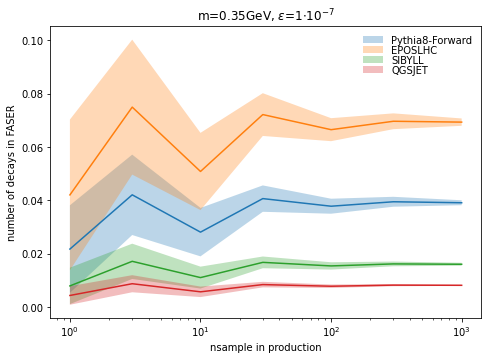

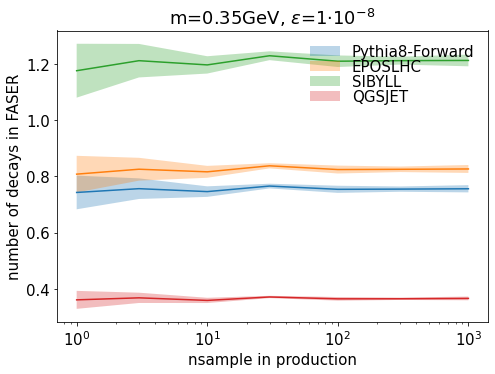

In [18]:
for coupling in couplings: 
    filename = "figures/"+modelname+"_nsample_"+str(mass)+"_"+str(coupling)+".pdf"
    plot = plot_nsample(summary, mass, coupling, nsamples, generators, ncopies, filename=filename)

## 4. Energy Distribution

Let's now make a plot of the energy distribution. 

In [19]:
# define couplings and nsample to use
couplings= [1.0e-7, 1.0e-08]
nsample_use = 100

# initiate summary dict
distributions = {}
edges = np.logspace( 2,  4, num=20+1)
centers = np.logspace( 2.05,  3.95, num=20)

# get numbers
for ncopy in range(ncopies):
    distributions[ncopy] = {}
    modes = {"221_"+str(nsample)+"_"+str(ncopy):generators, "331_"+str(nsample)+"_"+str(ncopy):generators, "321_"+str(nsample)+"_"+str(ncopy):generators, "-321_"+str(nsample)+"_"+str(ncopy):generators}
    output = foresee.get_events(mass=mass, energy=energy, couplings=couplings, modes=modes, nsample=30)
    coups, _, _, momenta, weights = output
    for coup, momentum, weight in zip(couplings, momenta, weights):
        distributions[ncopy][coup] = {}
        data = [p.e for p in momentum]
        for igen, generator in enumerate(generators): 
            wgts, _ = np.histogram(data, weights=weight.T[igen], bins=edges)
            distributions[ncopy][coup][generator] = wgts

And now we can plot everything

In [20]:
generators = ['Pythia8-Forward', 'EPOSLHC', 'SIBYLL', 'QGSJET']

def plot_energy(distributions, mass, coupling, generators, ncopies, logratio=False, filename=None):

    # initialize
    fig = plt.figure(figsize=(6,6))
    matplotlib.rcParams.update({'font.size': 14})
    ax1 = fig.add_axes([0.13, 0.40, 0.82, 0.55], xticklabels=[], )
    ax2 = fig.add_axes([0.13, 0.09, 0.82, 0.31],  )
    bins, xvals = np.logspace( 2,  4, num=20+1), np.logspace( 2.05,  3.95, num=20)    
    lines, maxval = {}, 0

    # add data
    maxval,baseline = 0, []
    for igen, generator in enumerate(generators):
        values = np.array([distributions[ncopy][coupling][generator] for ncopy in range (ncopies)]).T
        avg, std = np.array([np.mean(x) for x in values]), np.array([np.std(x) for x in values])
        if igen==0: baseline= avg
        ax1.fill_between(bins[:-1], avg+std, avg-std, step='post', alpha=0.3, label=generator)
        ax1.plot(bins[:-1], avg, drawstyle='steps-post') 
        
        ratio0 = [-1 if x0==0 else x1/x0 for x1,x0 in zip(avg    , baseline)]
        ratio1 = [-1 if x0==0 else x1/x0 for x1,x0 in zip(avg+std, baseline)]
        ratio2 = [-1 if x0==0 else x1/x0 for x1,x0 in zip(avg-std, baseline)]
        ax2.plot(bins[:-1], ratio0, drawstyle='steps-post') 
        ax2.fill_between(bins[:-1], ratio1, ratio2, step='post', alpha=0.3)
        if max(avg+std)>maxval: maxval=max(avg+std) 
        
    # get coupling
    exponent = int(math.floor(np.log10(abs(coupling))))
    prefactor = round(coupling*10**(-exponent),3)
    
    # finalize
    ax1.set_xscale("log")
    ax2.set_xscale("log")
    ax1.set_xlim(1e2, 1e4)
    ax2.set_xlim(1e2, 1e4)
    ax1.set_ylim(0, 1.1*maxval)
    ax1.set_title(r"m="+str(mass)+"GeV, $\epsilon$="+str(int(prefactor))+"$\cdot 10^{"+str(exponent)+"}$")
    ax2.set_xlabel(r"Energy $E$ [GeV]") 
    ax1.set_ylabel("Number of Decays per Bin") 
    ax2.set_ylabel("Relative to Baseline") 
    ax1.set_xticklabels([])
    if logratio: 
        ax2.set_yscale("log")
        ax2.set_ylim(0.25, 4.)
        ax2.set_yticks([0.33, 0.5, 1, 2, 3])
        ax2.set_yticklabels(["0.33","0.5","1","2","3"])
    else: 
        ax2.set_ylim(0,1.99)   
        
    #legend
    emean = sum([e*n for e,n in zip(bins, baseline)])/sum(baseline)
    if emean>1000: ax1.legend(frameon=False, labelspacing=0, loc="upper left")
    else: ax1.legend(frameon=False, labelspacing=0, loc="upper right")

    #save
    #fig.subplots_adjust(wspace=0, hspace=0, left=0.07, right=0.975, bottom=0.07, top=0.95 )
    if filename is not None: plt.savefig(filename)
    plt.show()

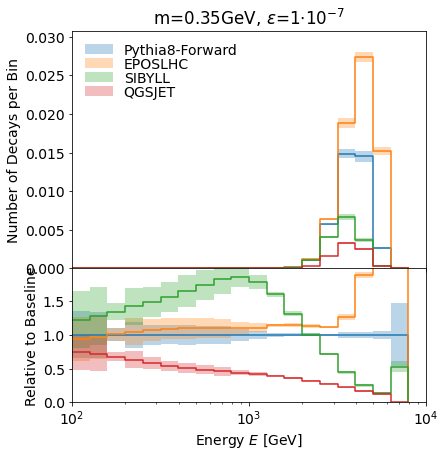

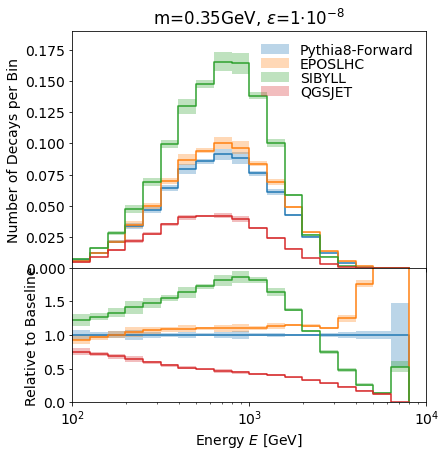

In [21]:
for coupling in couplings: 
    filename = "figures/"+modelname+"_Energy_"+str(mass)+"_"+str(coupling)+".pdf"
    plot_energy(distributions, mass, coupling, generators, ncopies, filename=filename)